Работая в нефтедобывающей компании, нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Регион 0. Информация о файле

In [3]:
display(geo_data_0.head())
geo_data_0.info()
geo_data_0.describe()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


### Регион 1. Информация о файле

In [4]:
display(geo_data_1.head())
geo_data_1.info()
geo_data_1.describe()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


### Регион 2. Информация о файле

In [5]:
display(geo_data_2.head())
geo_data_2.info()
geo_data_2.describe()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
print('Дубликатов в файле 0:', geo_data_0.duplicated().sum())
print('Дубликатов в файле 1:', geo_data_1.duplicated().sum())
print('Дубликатов в файле 2:', geo_data_2.duplicated().sum())

Дубликатов в файле 0: 0
Дубликатов в файле 1: 0
Дубликатов в файле 2: 0


Анализ файлов с данными:  
- Во всех файлах есть данные с нулевыми показателями столбца `product`.
- Дубликатов данных нет. Значит можно удалить столбец `id`, строки будут различаться по индексу как минимум.
- В файле 1 уже в первых пяти строках есть повторяющиеся значения столбца `product`.

Удаление столбца `id`:

In [7]:
geo_data_0 = geo_data_0.drop('id', axis=1)
geo_data_1 = geo_data_1.drop('id', axis=1)
geo_data_2 = geo_data_2.drop('id', axis=1)

Обработка нулевых значений файлов:

In [8]:
print('Количество нулевых значений product в файле 0:', geo_data_0[geo_data_0['product'] == 0]['f0'].count())
print('Количество нулевых значений product в файле 1:', geo_data_1[geo_data_1['product'] == 0]['f0'].count())
print('Количество нулевых значений product в файле 2:', geo_data_2[geo_data_2['product'] == 0]['f0'].count())

Количество нулевых значений product в файле 0: 1
Количество нулевых значений product в файле 1: 8235
Количество нулевых значений product в файле 2: 1


In [9]:
print('Количество уникальных значений product в файле 0:', len(geo_data_0['product'].unique()))
print('Количество уникальных значений product в файле 1:', len(geo_data_1['product'].unique()))
print('Количество уникальных значений product в файле 2:', len(geo_data_2['product'].unique()))


Количество уникальных значений product в файле 0: 100000
Количество уникальных значений product в файле 1: 12
Количество уникальных значений product в файле 2: 100000


Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

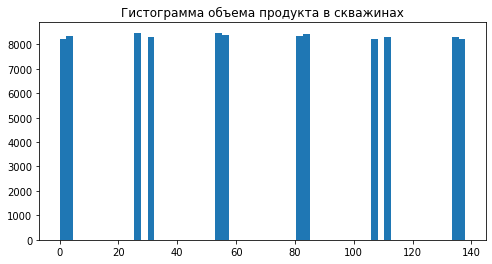

In [10]:
plt.figure(figsize=(8,4))
plt.hist(geo_data_1['product'], bins = 60)
plt.title("Гистограмма объема продукта в скважинах")
plt.show()

**Вывод**  
- В файлах geo_data_0 и geo_data_2 всё нормально, судя по первичной информации о файлах.
- В файле geo_data_1 в столбце продукт мало различных значений, данные распределены равномерно по значениям. Потому в файле очень много нулевых значений, которые лучше не удалять, так как это может повлиять на данные в целом. Также нельзя их заменить на среднее - это может очень исказить данные. Такие данные могли возникнуть скорее всего из-за ручной модернизации файла.

## Обучение и проверка модели

Для обучения модели подходит только линейная регрессия.  
Так как для трех регионов нужно провести одни и те же исследования - напишу функцию.  
Функция на вход принимает данные о регионе. Внутри функция отделяет целевой признак, делит выборки на обучающую и валидационную в соотношении 3:1, стандартизирует данные, обучает модель линейной регрессии и рассчитывает RMSE и средний запас предсказанного сырья.  
Функция возвращает предсказания, средний запас предсказанного сырья и правильные ответы.

In [11]:
def linear_regression(data):
   
    target = data["product"]
    features = data.drop(["product"], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lin_regr = LinearRegression(normalize=False)
    lin_regr.fit(features_train, target_train)
    predictions = lin_regr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))  
    average_stock = data['product'].mean()
    average_stock_pred = predictions.mean()
    print('Средний запас предсказанного сырья в регионе: {:.2f} тыс. баррелей'.format(average_stock_pred))
    print('RMSE модели в регионе = {:.2f}'.format(rmse))
    return predictions, average_stock, target_valid.reset_index(drop=True)

**Регион 0**

In [12]:
predictions_0, average_stock_0, target_valid_0 = linear_regression(geo_data_0)

Средний запас предсказанного сырья в регионе: 92.59 тыс. баррелей
RMSE модели в регионе = 37.58


**Регион 1**

In [13]:
predictions_1, average_stock_1, target_valid_1 = linear_regression(geo_data_1)

Средний запас предсказанного сырья в регионе: 68.73 тыс. баррелей
RMSE модели в регионе = 0.89


**Регион 2**

In [14]:
predictions_2, average_stock_2, target_valid_2 = linear_regression(geo_data_2)

Средний запас предсказанного сырья в регионе: 94.97 тыс. баррелей
RMSE модели в регионе = 40.03


**Вывод**

- Средний запас предсказанного сырья в регионе 2 наибольший, в регионе 0 немного меньше. В регионе 1 наименьший средний запас предсказанного сырья.  
- RMSE модели наилучший в Регионе 1, скорее всего из-за малой вариативности данных целевого признака. В регионах 2 и 0 показатель RMSE высокий, что говорит о том, что модель дает плохо прогнозируемые результаты.

## Подготовка к расчёту прибыли

Сохраняем все ключенвые значения для рассчетов в отдельных переменных

In [15]:
POINTS = 500
BEST_POINTS = 200
BUDGET = 10e10
PROFIT_BARREL = 45*10e4
RISK_ES = 0.025

In [16]:
sufficient_budget = BUDGET/BEST_POINTS
print('Достаточный объём сырья для безубыточной разработки новой скважины: {:.2f} тыс. баррелей'
      .format(sufficient_budget/PROFIT_BARREL))

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


In [17]:
print('Средний запас предсказанного сырья в регионе 0: {:.2f} тыс. баррелей'.format(average_stock_0))
print('Средний запас предсказанного сырья в регионе 1: {:.2f} тыс. баррелей'.format(average_stock_1))
print('Средний запас предсказанного сырья в регионе 2: {:.2f} тыс. баррелей'.format(average_stock_2))

Средний запас предсказанного сырья в регионе 0: 92.50 тыс. баррелей
Средний запас предсказанного сырья в регионе 1: 68.83 тыс. баррелей
Средний запас предсказанного сырья в регионе 2: 95.00 тыс. баррелей


Напишем функцию для рассчета прибыли

Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:  
На вход функция получает предсказания и правильные ответы, объединяет их и сортирует по предсказаниям.  
Возвращает прибыль с первых 200 скважин.

In [18]:
def profit(prediction, target):
    data = pd.concat([prediction, target],axis=1)
    data.columns = ['prediction','target']
    data = data.sort_values(by = 'prediction', ascending = False)[:BEST_POINTS]
    return (data['target'].sum() * PROFIT_BARREL - BUDGET)

**Вывод**  

- Во всех регионах средний запас предсказанного сырья  меньше объема для безубыточной разработки.
- Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей
- Необходимо выделить только наиболее перспективные скважины.

## Расчёт прибыли и рисков 

Прибыль с первых 200 скважин по предсказанному объёму в регионах:

In [19]:
estim_profit = profit(predictions_0, target_valid_0)
print('Прибыль с первых 200 скважин по предсказанному объёму в регионe 0: {:.4f} млрд.руб'.format(estim_profit/10e9))

Прибыль с первых 200 скважин по предсказанному объёму в регионe 0: 3.3208 млрд.руб


In [20]:
estim_profit = profit(predictions_1, target_valid_1)
print('Прибыль с первых 200 скважин по предсказанному объёму в регионe 1: {:.4f} млрд.руб'.format(estim_profit/10e9))

Прибыль с первых 200 скважин по предсказанному объёму в регионe 1: 2.4151 млрд.руб


In [21]:
estim_profit = profit(predictions_2, target_valid_2)
print('Прибыль с первых 200 скважин по предсказанному объёму в регионe 2: {:.4f} млрд.руб'.format(estim_profit/10e9))

Прибыль с первых 200 скважин по предсказанному объёму в регионe 2: 2.7103 млрд.руб


Функция для рассчета средней прибыли региона, 95%-го доверительного интевала и процента риска.  
На вход функция получает предсказания и правильные ответы. Техникой *Bootstrap* с 1000 выборок находит распределение прибыли и выводит среднюю прибыль региона, доверительный 95%й интервал и процент риска.

In [22]:
def net_profit(prediction, target):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        values.append(profit(pred_subsample, target_subsample))
    values = pd.Series(values)
    profit_mean = np.mean(values) / 10e6
    lower = values.quantile(0.025) / 10e6
    upper = values.quantile(0.975) / 10e6
    loss_risk = (values < 0).sum() / values.count()
    
    print('Средняя прибыль региона {:.2f} млн.руб.'.format(profit_mean))
    print('95% доверительный интервал от {:.2f} до {:.2f} млн.руб.'.format(lower, upper))
    print('Процент риска {:.1%}'.format(loss_risk))

**Регион 0**

In [23]:
net_profit(predictions_0, target_valid_0)

Средняя прибыль региона 396.16 млн.руб.
95% доверительный интервал от -111.22 до 909.77 млн.руб.
Процент риска 6.9%


**Регион 1**

In [24]:
net_profit(predictions_1, target_valid_1)

Средняя прибыль региона 456.05 млн.руб.
95% доверительный интервал от 33.82 до 852.29 млн.руб.
Процент риска 1.5%


**Регион 2**

In [25]:
net_profit(predictions_2, target_valid_2)

Средняя прибыль региона 404.40 млн.руб.
95% доверительный интервал от -163.35 до 950.36 млн.руб.
Процент риска 7.6%


**Вывод**  

- Без учета рисков Регион 0 показал наибольшую прибыль с 200 скважин. Наименьшую прибыль показал Регион 1.  
- С учетом рисков средняя прибыль регионов изменилась:  
 - Наименьшую среднюю прибыль показал Регион 0  
 - Наибольшую среднюю прибыль показал Регион 1
 - С учетом рисков Регион 0 и Регион 2 имеют вероятность убытков более 2.5%
 - Средняя прибыль Региона 1: 456.05 млн.руб.
 - Процент риска Региона 1: 1.5%


**Предложения**

**Регион 1** является самым перспективным как в плане средней прибыли(456.05 млн.руб.), так и наименьшего процента риска (1.5%)  
**Регион 0** и **Регион 2** имеют меньшую среднюю прибыль и больший процент риска.
